In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [51]:
df = pd.read_csv('tabular/final_tracks.csv', skipinitialspace=False)

## Data partitioning

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
y = df["genre"]
X = df.drop(columns=["id", "name", "artists", "genre"])
feature_names = X.columns

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8)

In [55]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

## Model creation

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
bb = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=100, n_jobs=-1,
                       random_state=8)

bb.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_jobs=-1, random_state=8)

In [58]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [59]:
y_pred = bb_predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.3479313904550147
F1-score [0.20985692 0.33802817 0.         0.03015075 0.375      0.16296296
 0.52531646 0.38344828 0.03370787 0.14457831 0.36397749 0.04395604
 0.27027027 0.47302905 0.39721254 0.12537313 0.56398104 0.26004728
 0.82532751 0.24523161 0.04081633 0.1552795  0.23353293 0.16312057
 0.47222222 0.23452769 0.31443299 0.59574468 0.27703985 0.
 0.         0.06666667 0.01257862 0.18660287 0.         0.40726329
 0.24847251 0.31481481 0.14243323 0.03278689 0.33110368 0.05504587
 0.76379066 0.18274112 0.24283765 0.31965443 0.49345794 0.18729097
 0.34331337 0.55183946 0.34036939 0.2372093  0.59445178 0.31358885
 0.33214286 0.14795918 0.         0.06091371 0.22330097 0.53529412
 0.43018868 0.49772382 0.19662921 0.1640625  0.18543046 0.31610044
 0.49150327 0.12903226 0.03125    0.12863071 0.32686981 0.04819277
 0.34732272 0.35117773 0.11428571 0.5361552  0.46917808 0.50106157
 0.47226624 0.5027933  0.08484848 0.40320427 0.340625   0.32954545
 0.23167849 0.         0.17391304

In [79]:
y_pred_proba = bb_predict_proba(X_test)

In [97]:
for i in range(50000):
    if(y[i]!=y_pred[i] and y[i]=="sleep"):
        print(i, y[i], y_pred[i], max(y_pred_proba[i]))

17879 sleep hip-hop 0.11731666551207956
17880 sleep k-pop 0.2079990659515201
17881 sleep chicago-house 0.1589010632369423
17882 sleep tango 0.2285792221009215
17883 sleep cantopop 0.07198137990823819
17884 sleep ska 0.06686308493008196
17885 sleep kids 0.2659910842085228
17886 sleep salsa 0.18147673294485642
17887 sleep groove 0.07251299421944238
17888 sleep metalcore 0.20348898688561337
17889 sleep latin 0.12201352135949911
17890 sleep pop 0.12143009781781693
17891 sleep salsa 0.11993391455699116
17892 sleep kids 0.07600381680848761
17893 sleep hardstyle 0.17546743090156092
17894 sleep cantopop 0.07271870657435653
17895 sleep chicago-house 0.2059056151804744
17896 sleep chicago-house 0.6157181508254406
17897 sleep pagode 0.11843685314422224
17898 sleep rock 0.05683774200738831
17899 sleep progressive-house 0.12827782931003304
17900 sleep j-pop 0.11094111524887662
17901 sleep iranian 0.08580792997833346
17902 sleep psych-rock 0.08849663385081215
17903 sleep turkish 0.04831480834771384


IndexError: index 25186 is out of bounds for axis 0 with size 25186

In [98]:
#x1 = 18077 sleep 0.7553084057514332 (corretto)
#x2 = 18158 sleep->comedy 0.7417505454541444 (errato)

i2e1 = 18077
i2e2 = 18158
x1 = X_test[i2e1]
x2 = X_test[i2e2]

## SHAP

In [61]:
import shap
shap.initjs()

In [63]:
f = lambda x: bb_predict_proba(x)[:, 1]
med = np.median(X_train, axis=0).reshape((1, X_train.shape[1]))

In [64]:
shap_explainer = shap.KernelExplainer(f, med)

In [65]:
shap_values_single = shap_explainer.shap_values(x, nsamples=1000)

In [66]:
shap_values_single

array([ 0.00283831,  0.        , -0.01083998, -0.00075304,  0.00232388,
        0.00014818,  0.00040933,  0.        , -0.00465975,  0.00109107,
        0.01001823,  0.        , -0.0050053 , -0.00028466,  0.        ,
        0.        , -0.00279682,  0.00013871, -0.00014257])

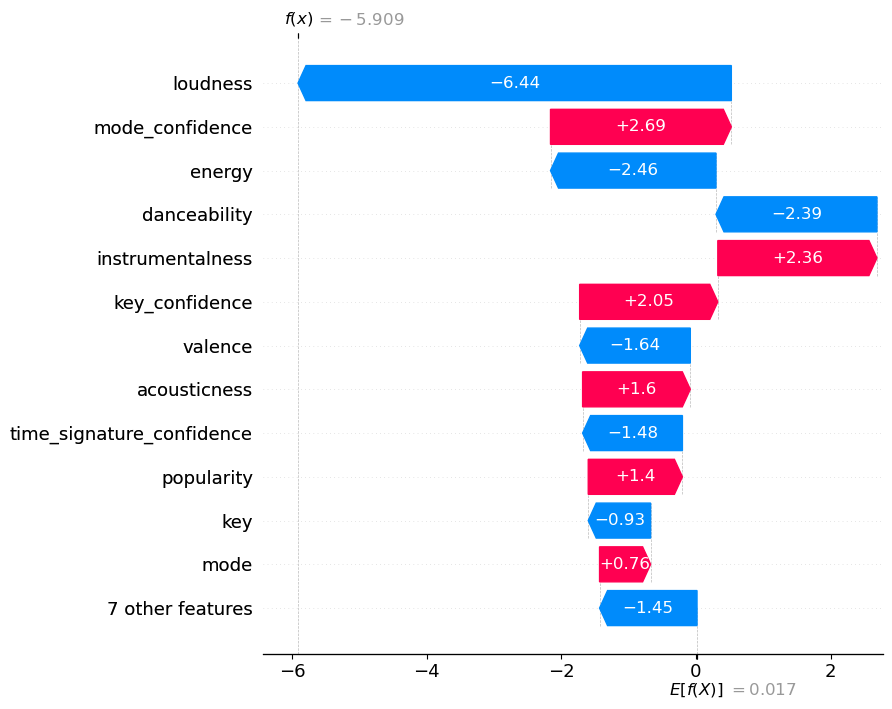

In [101]:
shap.plots._waterfall.waterfall_legacy(shap_explainer.expected_value,x1,
                                            feature_names=list(feature_names), max_display=13)

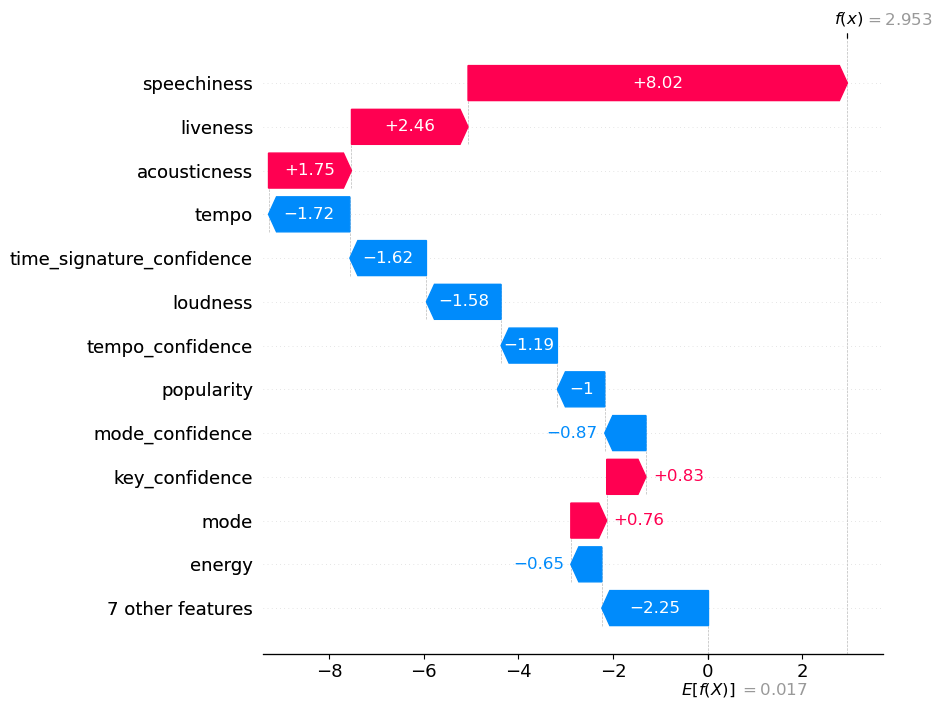

In [109]:
shap.plots._waterfall.waterfall_legacy(shap_explainer.expected_value,x2,
                                            feature_names=list(feature_names), max_display=13)